In [11]:
import statsmodels.api as sm
import numpy as np
import pandas as pd


In [12]:
df = pd.read_excel('../data_processed/men_women_activists.xlsx')

In [14]:
df.loc[df['gender'] == 'female', 'sex'] = 1
df.loc[df['gender'] == 'male', 'sex'] = 0

In [28]:
# keywords = ['women', 'education', 'school', 'university', 'girl']
# filtered_df = df[df['text'].str.contains('|'.join(keywords), case=False, regex=True)]
# X = filtered_df[['sex']]
# y = filtered_df['label']
# # Add a constant term to the predictor variables
# X = sm.add_constant(X)
# # Fit the logistic regression model
# model = sm.Logit(y, X).fit()
# # Print the summary
# print(model.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                20090
Model:                          Logit   Df Residuals:                    20088
Method:                           MLE   Df Model:                            1
Date:                Thu, 01 Jun 2023   Pseudo R-squ.:                     inf
Time:                        22:09:19   Log-Likelihood:            -5.5106e-08
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.7231   2.64e+05      0.000      1.000   -5.17e+05    5.17e+05
sex           -7.4898   2.64e+05  -2.84e-05      1.000   -5.17e+0

c:\Users\saboor\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\saboor\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\saboor\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\saboor\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or predictio

In [16]:


X = df[['sex']]  
y = df['label']  
# Add a constant term to the predictor variables
X = sm.add_constant(X)
# Fit the logistic regression model
model = sm.Logit(y, X).fit()
# Print the summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.666068
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                52246
Model:                          Logit   Df Residuals:                    52244
Method:                           MLE   Df Model:                            1
Date:                Thu, 01 Jun 2023   Pseudo R-squ.:               0.0002533
Time:                        22:00:07   Log-Likelihood:                -34799.
converged:                       True   LL-Null:                       -34808.
Covariance Type:            nonrobust   LLR p-value:                 2.681e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5241      0.016    -33.420      0.000      -0.555      -0.493
sex            0.0803      0.

In [17]:
keywords = ['women', 'education', 'school', 'university', 'girl']
filtered_df = df[df['text'].str.contains('|'.join(keywords), case=False, regex=True)]

X = filtered_df[['sex']]
y = filtered_df['label']

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the summary
print(model.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                20090
Model:                          Logit   Df Residuals:                    20088
Method:                           MLE   Df Model:                            1
Date:                Thu, 01 Jun 2023   Pseudo R-squ.:                     inf
Time:                        22:00:08   Log-Likelihood:            -5.5106e-08
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.7231   2.64e+05      0.000      1.000   -5.17e+05    5.17e+05
sex           -7.4898   2.64e+05  -2.84e-05      1.000   -5.17e+0

c:\Users\saboor\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\saboor\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\saboor\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\saboor\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or predictio

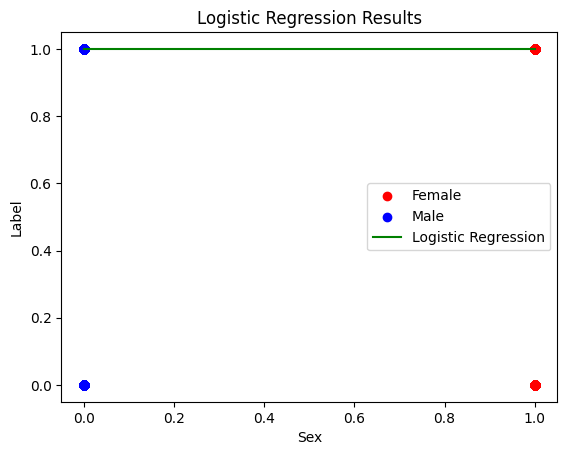

In [18]:
import matplotlib.pyplot as plt
# Separate the data points by gender
female_data = df.loc[df['gender'] == 'female']
male_data = df.loc[df['gender'] == 'male']

# Plot the actual data points
plt.scatter(female_data['sex'], female_data['label'], color='red', label='Female')
plt.scatter(male_data['sex'], male_data['label'], color='blue', label='Male')

# Plot the logistic regression curve
x_range = np.linspace(df['sex'].min(), df['sex'].max(), 100)
x_range = sm.add_constant(x_range)
y_pred = model.predict(x_range)
plt.plot(x_range[:, 1], y_pred, color='green', label='Logistic Regression')

# Set plot labels and title
plt.xlabel('Sex')
plt.ylabel('Label')
plt.title('Logistic Regression Results')

# Add a legend
plt.legend()

# Display the plot
plt.show()
